In [1]:
import pandas as pd
import numpy as np
import re
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from Bresenheim import *
import pickle
from itertools import product
from scipy import ndimage
from numpy.linalg import norm
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [13]:
# load tracks : 
files = glob.glob('../data/real_cells/exp*.txt')
dfs = []
for f in files:
    df = pd.read_csv(f, sep="\t", names=['cell_id', 'time_id', 'time', 'x', 'y', 'z'])   
    df['experiment'] = filename[19:28]
    df['cell_type'] = filename[29:32]
    df['movie'] = filename[38:39]
    dfs.append(df)
    
df = pd.concat(dfs)

In [14]:
print(files)

['../data/real_cells/exp090814_cd4_movie2.txt', '../data/real_cells/exp090814_cd4_movie3.txt', '../data/real_cells/exp090814_cd8_movie1.txt', '../data/real_cells/exp090929_cd8_movie3.txt', '../data/real_cells/exp090814_cd8_movie4.txt', '../data/real_cells/exp090929_cd8_movie2.txt', '../data/real_cells/exp101210_cd4_movie1.txt', '../data/real_cells/exp101210_cd8_movie1.txt', '../data/real_cells/exp101208_cd8_movie5.txt', '../data/real_cells/exp101208_cd4_movie5.txt', '../data/real_cells/exp090929_cd4_movie2.txt', '../data/real_cells/exp090929_cd4_movie3.txt', '../data/real_cells/exp101210_cd8_movie7.txt', '../data/real_cells/exp090814_cd8_movie3.txt', '../data/real_cells/exp101210_cd4_movie7.txt', '../data/real_cells/exp090814_cd4_movie4.txt', '../data/real_cells/exp090814_cd4_movie1.txt', '../data/real_cells/exp090814_cd8_movie2.txt']


In [15]:
df.head()
# df[['x','y','z']]

,cell_id,time_id,time,x,y,z,experiment,cell_type,movie
0,1000000000,1,30,0.304,189.208,20.45100,exp090814,cd4,2
1,1000000000,2,60,4.657,192.111,16.00501,exp090814,cd4,2
2,1000000000,3,90,8.031,191.433,13.40800,exp090814,cd4,2
3,1000000000,4,120,16.071,191.137,13.30001,exp090814,cd4,2
4,1000000000,5,150,18.397,191.814,10.42001,exp090814,cd4,2


In [16]:
df_list = [df[df.cell_id == i] for i in df.cell_id.unique()]

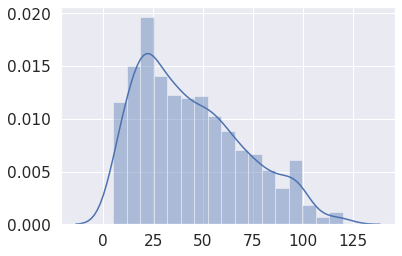

In [17]:
time_hist = [len(data.time.unique()) for data in df_list]
sns.distplot(time_hist)
plt.show()

In [18]:
len([t for t in time_hist if t > 80])

166

In [19]:
### extract tracks from all files
counter = 0
for f in files:
    print(f)
    df = pd.read_csv(f, sep="\t", names=['cell_id', 'time_id', 'time', 'x', 'y', 'z'])   
    df['experiment'] = f[19:28]
    df['cell_type'] = f[29:32]
    df['movie'] = f[38:39]
    #df = df[df.cell_type == 'cd8']
    df_list = [df[df.cell_id == i] for i in df.cell_id.unique()]
    for data in df_list:
        if len(data.time.unique()) > 80:
            track = data[['x','y','z']].to_numpy()
            name = '../data/real_cells/Mlab_track' + str(counter) + '.txt'
            np.savetxt(name,track)
            counter += 1

../data/real_cells/exp090814_cd4_movie2.txt
../data/real_cells/exp090814_cd4_movie3.txt
../data/real_cells/exp090814_cd8_movie1.txt
../data/real_cells/exp090929_cd8_movie3.txt
../data/real_cells/exp090814_cd8_movie4.txt
../data/real_cells/exp090929_cd8_movie2.txt
../data/real_cells/exp101210_cd4_movie1.txt
../data/real_cells/exp101210_cd8_movie1.txt
../data/real_cells/exp101208_cd8_movie5.txt
../data/real_cells/exp101208_cd4_movie5.txt
../data/real_cells/exp090929_cd4_movie2.txt
../data/real_cells/exp090929_cd4_movie3.txt
../data/real_cells/exp101210_cd8_movie7.txt
../data/real_cells/exp090814_cd8_movie3.txt
../data/real_cells/exp101210_cd4_movie7.txt
../data/real_cells/exp090814_cd4_movie4.txt
../data/real_cells/exp090814_cd4_movie1.txt
../data/real_cells/exp090814_cd8_movie2.txt


In [ ]:
def auto_cor(cell_track): 
    averages = []
    for dt in range(0,80):
        # angles per dt: 
        cosines = []
        for i in range(len(cell_track) - 1 - dt):
            point1 = cell_track[i]
            point2 = cell_track[i + 1]
            point3 = cell_track[i + dt]
            point4 = cell_track[i + dt + 1]
            v1 = point2 - point1
            v2 = point4 - point3
            #cos = np.clip(np.dot(v1,v2)/(norm(v1) * norm(v2)),0,1)
            cos = np.dot(v1,v2)/(norm(v1) * norm(v2))
            #cos = abs(np.dot(v1,v2)/(norm(v1) * norm(v2)))
            cosines.append(cos)

        #if len(cosines) > 100: #minimum 100 mcs with actual displacement
        averages.append(np.average(cosines))

    return averages

In [ ]:
track_files = glob.glob('../data/real_cells/Mlab_track*.txt')
autocorrelations = []
tracks = []
for f in track_files:
    print(f)
    track = np.loadtxt(f)
    AC = auto_cor(track)
    if np.nan not in AC:
        tracks.append(track)
        #print(len(AC))
        #flat = [x in sublist in AC for x in sublist]
        #flat  = [item for sublist in AC for item in sublist]
        #flat = [x for x in sublist for sublist in AC]
        autocorrelations.append(AC)


#autocorrelations = [item for sublist in autocorrelations for item in sublist]
#ac = np.array(autocorrelations)
#print(ac.shape)

#print(av_ac.shape)

In [ ]:
ac_df = pd.DataFrame(autocorrelations)
ac_df = ac_df.dropna()
ac_df.head()

In [ ]:
%matplotlib notebook
plt.figure(figsize = (10,10))
plt.plot(ac_df.T.to_numpy(),alpha = 0.1)
plt.plot(np.average(ac_df.T.to_numpy(),axis = 1))
plt.ylabel('Autocorrelation')
plt.xlabel('delta T')
plt.title('average autocorrelation of MotilityLab data')
plt.show

In [ ]:
plt.scatter(np.average(ac_df.T.to_numpy(),axis = 1),)

In [ ]:
np.average(ac_df.T.to_numpy(),axis = 1)

In [ ]:
%matplotlib notebook
plt.imshow(autocorrelations)
plt.colorbar()
plt.show()

In [ ]:
%matplotlib notebook
#autocorrelations = np.array(autocorrelations).T
#print(autocorrelations[0,:])
##plt.plot(range(len(autocorrelations) - 1),autocorrelations)
#plt.plot(autocorrelations[1:],alpha = .2)
plt.plot(np.average(autocorrelations[1:]))
plt.show()
print(np.average(autocorrelations[1:]))
#print(len(tracks),len(autocorrelations))

In [ ]:
from CPM_helpers1 import plot_celltrack
%matplotlib notebook

cell_track = tracks[68]

# plot path of center of mass  :
x = [c[0] for c in cell_track]
y = [c[1] for c in cell_track]
z = [c[2] for c in cell_track]

#fig = plt.figure()
ax = plt.axes(projection='3d')#projection='3d'
ax.plot3D(x,y,z)
ax.scatter3D(x[0],y[0],z[0],label = 'start')
ax.scatter3D(x[-1],y[-1],z[-1],label = 'end')
ax.legend()
plt.show()

In [ ]:
import networkx as nx 



In [ ]:
%matplotlib notebook
# load tracks : 
filename = "./exp090814_cd4_movie1.txt"
df = pd.read_csv(files[0], sep="\t", names=['cell_id', 'time_id', 'time', 'x', 'y', 'z'])   
df['experiment'] = filename[2:11] 
df['cell_type'] = filename[12:15]
df['movie'] = filename[21:22]

def auto_cor(cell_track, dots_for_dts, dts): 
    for dt in range(0,dts):
        dots = []
        for i in range(len(cell_track) - 1 - dt):
            point1 = cell_track[i]
            point2 = cell_track[i + 1]
            point3 = cell_track[i + dt]
            point4 = cell_track[i + dt + 1]
            v1 = point2 - point1
            v2 = point4 - point3
            dot = np.dot(v1,v2)/(norm(v1) * norm(v2))
            dots.append(dot)
        dots_for_dts[dt].extend(dots)

dts = 80
dots_for_dts = [[] for i in range(dts)]

for cell_id in df.cell_id.unique():
    celldf = df[df.cell_id == cell_id]
    track = celldf[['x','y','z']].to_numpy()
    auto_cor(track, dots_for_dts, dts)
    
averages = [np.mean(i) for i in dots_for_dts]

plt.scatter(range(dts), averages)
plt.show()

In [ ]:
def auto_cor(cell_track, dots_for_dts, dts): 
    for dt in range(0,dts):
        dots = []
        for i in range(len(cell_track) - 1 - dt):
            point1 = cell_track[i]
            point2 = cell_track[i + 1]
            point3 = cell_track[i + dt]
            point4 = cell_track[i + dt + 1]
            v1 = point2 - point1
            v2 = point4 - point3
            dot = np.dot(v1,v2)/(norm(v1) * norm(v2))
            dots.append(dot)
        dots_for_dts[dt].extend(dots)

dts = 80
dots_for_dts = [[] for i in range(dts)]


for f in track_files:
    track = np.loadtxt(f)
    auto_cor(track,dots_for_dts,dts)
    
# for cell_id in df.cell_id.unique():
#     celldf = df[df.cell_id == cell_id]
#     track = celldf[['x','y','z']].to_numpy()
#     auto_cor(track, dots_for_dts, dts)
    

    
averages = [np.mean(i) for i in dots_for_dts]